# **Fake Job Posting Detection Project** <br>
A project for the Digital Assessments of the course BCSE209L Machine Learning.<br><br>

**Efforts By :**
<BR> 21BCE6015 Sparsh Saxena
<BR> 21BCE5940 Shivangi Agarwal
<BR> 21BCE6026 Aishwarya L.
<br><br>

**Google Colab Notebook Link: https://colab.research.google.com/drive/14_2SkBKDYu-dhJKHx65Z0z_2e806GCtv#scrollTo=mnfpju7ksDBQ**

**Problem Description :** <br>
Fraudulent job postings pose a significant threat to online job seekers, leading to financial loss and identity theft. Detecting these fake postings manually is inefficient. Hence, there's a critical need for an automated solution leveraging machine learning techniques. <br><br>


**Dataset Information :** <br>
The Employment Scam Aegean Dataset (EMSCAD) is a publicly available dataset containing 17,880 real-life job ads that aims at providing a clear picture of the Employment Scam problem to the research community and can act as a valuable testbed for scientists working on the field. Our first publication is available online by MDPI Future Internet Journal.

EMSCAD records were manually annotated and classified into two categories. More specifically, the dataset contains 17,014 legitimate and 866 fraudulent job ads published between 2012 to 2014. <br><br>

<b> Data Source : </b> <br>
https://www.kaggle.com/datasets/amruthjithrajvr/recruitment-scam
<br><br>

**Steps undertaken by us to analyse and produce results from the dataset :**
1. Importing the necessary libraries for further use in the notebook.
2. Exploring and cleaning the dataset by filling up textual null values and removing numerical categorical columns as they were inefficient in contributing to the actual predictions.
3. Removing the imbalance from the dataset by dropping most of the excess majority label records using Random Undersampling.
4. Exploratory Data Analysis to gather any useful insights from the data.
5. Data Preprocessing to ensure the remaining textual features are ready for feature extraction in the next step.
6. Performing feature extraction by leveraging the TF-IDF Vectorizer and Column Transformer to apply it for latency purposes.
7. Doing the train test split on the dataset for getting test and train datasets (80% train and 20% test).
8. Model Evaluations to study which one is conclusively best and saving the model in a pickle file.
9. Use the saved model to make predictions in future. <br><br>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries for use**

In [3]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,f1_score,accuracy_score,precision_score
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import (
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              AdaBoostClassifier
                             )
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import warnings
import pickle
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Exploring and Cleaning the Dataset**

In [4]:
# Read the CSV file

df = pd.read_csv('/content/drive/My Drive/fake_job_postings.csv')

In [5]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
# Checking the type of values and for null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# Shape of the dataset

df.shape

(17880, 18)

In [8]:
# Description of the numerical columns of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [9]:
# Number of null values in the dataset columns

print("No. of null values per column in the dataset: \n")
df.isnull().sum()

No. of null values per column in the dataset: 



job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
# Fill the null values in the dataset in the textual columns with a space.

df.fillna(" ",inplace = True)

In [11]:
# Checking the non-text and text columns in the dataset.

textual = []
numerical = []

for col in df.columns:
    if df[col].dtypes !='object':
      numerical.append(col)
    else:
      textual.append(col)

print(f"There are {len(textual)} textual columns : \n{textual}")
print()
print(f"There are {len(numerical)} numerical/categorical columns : \n{numerical}")

There are 13 textual columns : 
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

There are 5 numerical/categorical columns : 
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [12]:
# 'job_id' column does not have any correlation with the target column, so dropping it.

df.drop('job_id',axis=1,inplace = True)

In [13]:
# Counts for the fraudulent target column.

df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [14]:
# Performing Random Undersampling on the dataset to remove the imbalance in values for both labels in target column

X_ = df.drop('fraudulent',axis=1)
y_ = df['fraudulent']

rus = RandomUnderSampler(random_state=42,replacement=True)
X_resampled, y_resampled = rus.fit_resample(X_,y_)

df = pd.concat([X_resampled,y_resampled],axis=1)

df.head(5)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Business Development Call Center Rep,"US, SC, Beaufort",BDC,,Stokes Automotive Group-Beaufort is a family o...,"Stokes Automotive Group, located in Beaufort, ...",Job Requirements Pleasant and engaging phone p...,Benefits IncludeOur team members enjoy a posit...,0,1,1,Full-time,Entry level,High School or equivalent,Automotive,Business Development,0
1,Service Champion Full-time and Part-time,"US, NY, Port Chester",,,,Normal 0 false false false ...,,,0,0,0,Full-time,,,Consumer Goods,Customer Service,0
2,Human Resources Partner,"US, CA, Redlands",HR,,Our passion for improving quality of life thro...,Join a growing team of talented individuals an...,"EDUCATION: Bachelor’s in human resources, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,,Information Technology and Services,Human Resources,0
3,Enterprise Integration Developer,"US, CA, Redlands",Technology,,Our passion for improving quality of life thro...,POSITION: Enterprise Integration DeveloperLOCA...,THE IDEAL CANDIDATES: REQUIREMENTS/QUALIFICATI...,WHY ESRI?Our culture is anything but corporate...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
4,Senior Software Engineer - Android,"US, TX, Austin/San Antonio",R&D,,WellAware is an oil field communications and s...,The Senior Software Engineer is highly experie...,Essential Duties and Responsibilities: Design...,,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Engineering,0


In [15]:
# New shape of the dataset.

df.shape

(1732, 17)

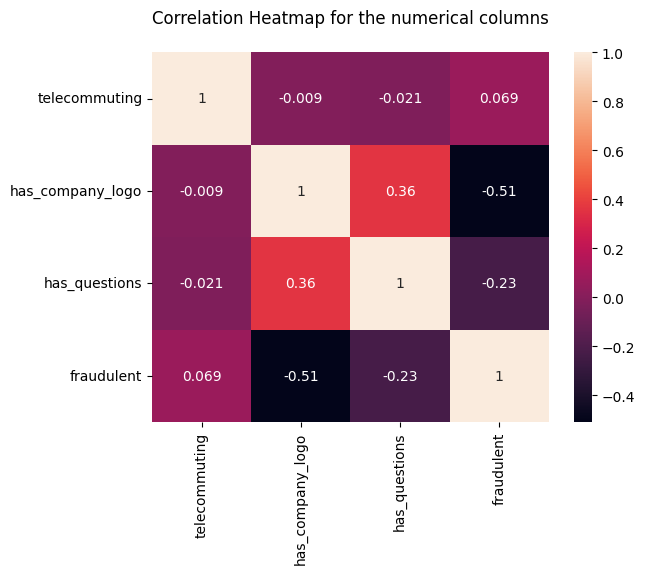

In [16]:
# Checking the correlation of the numerical columns with the target column.

df_corr = df.copy()
df_corr.drop(textual,axis=1,inplace=True)

plt.title("Correlation Heatmap for the numerical columns\n")
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

In [17]:
# Removing the numerical columns as they do not possess any notable correlation with the target column.

numerical.remove('job_id')
numerical.remove('fraudulent')

df.drop(numerical,axis=1,inplace=True)

# **EDA (Exploratory Data Analysis)**

<Axes: xlabel='fraudulent', ylabel='count'>

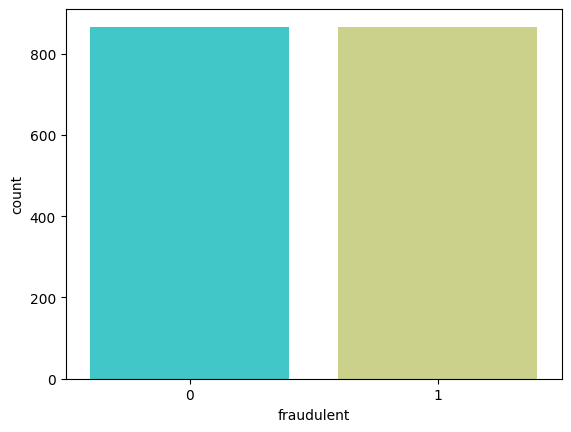

In [18]:
# Visualisation for the count of fraud and genuine labels of target column.

sns.countplot(x = "fraudulent", data = df, palette = "rainbow")

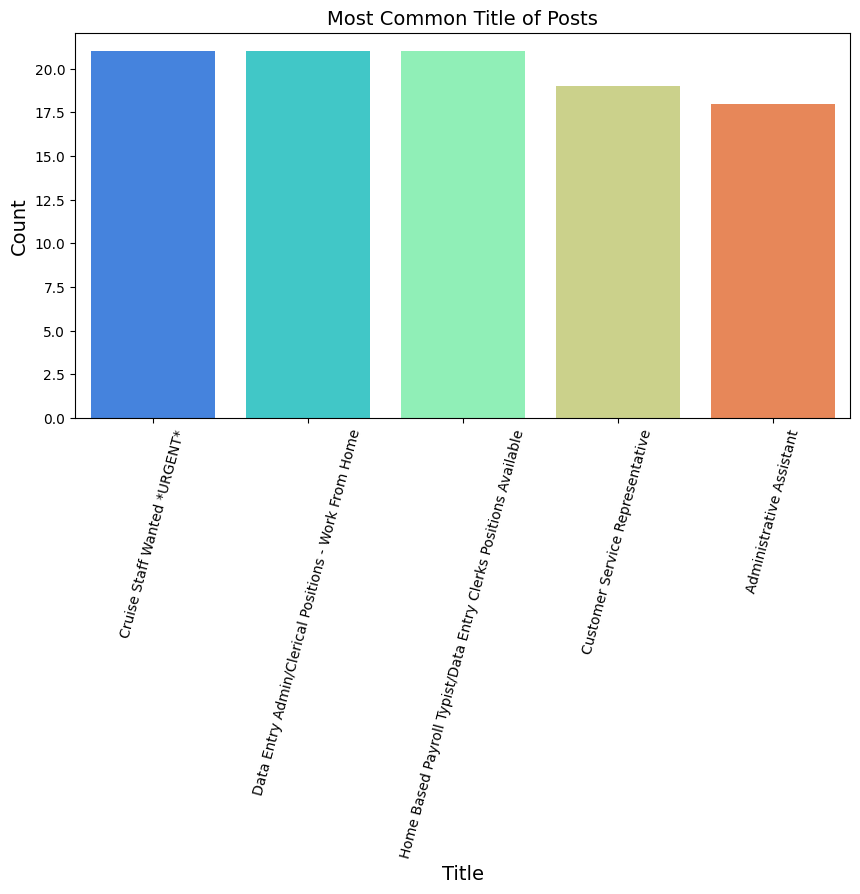

In [19]:
# Most Common Type of Posts in the dataset.

title = df.title.value_counts()[:5]
plt.figure(figsize = (10,5))
plt.title("Most Common Title of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Title", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=75)
sns.barplot(x = title.index, y = title, palette = "rainbow")
plt.show()

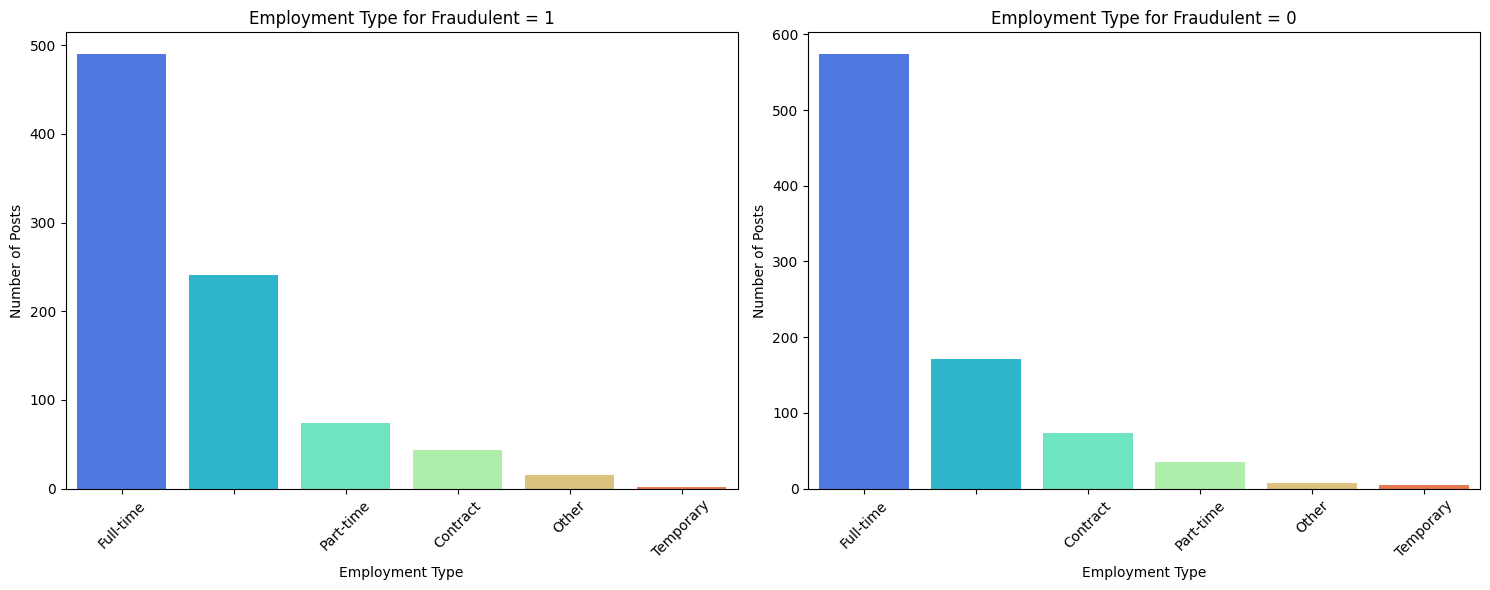

In [20]:
# Checking out the employment types for both the target labels.

# Filter the DataFrame for rows where fraudulent equals 1
df_fraudulent_1 = df[df['fraudulent'] == 1]
employment_type_fraudulent_1 = df_fraudulent_1['employment_type'].value_counts()

# Filter the DataFrame for rows where fraudulent equals 0
df_fraudulent_0 = df[df['fraudulent'] == 0]
employment_type_fraudulent_0 = df_fraudulent_0['employment_type'].value_counts()

# Set the size of the figure
plt.figure(figsize=(15, 6))

# Graph for fraudulent = 1
plt.subplot(1, 2, 1)
sns.barplot(x=employment_type_fraudulent_1.index, y=employment_type_fraudulent_1,palette = "rainbow")
plt.title("Employment Type for Fraudulent = 1")
plt.xlabel("Employment Type")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)

# Graph for fraudulent = 0
plt.subplot(1, 2, 2)
sns.barplot(x=employment_type_fraudulent_0.index, y=employment_type_fraudulent_0,palette = "rainbow")
plt.title("Employment Type for Fraudulent = 0")
plt.xlabel("Employment Type")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

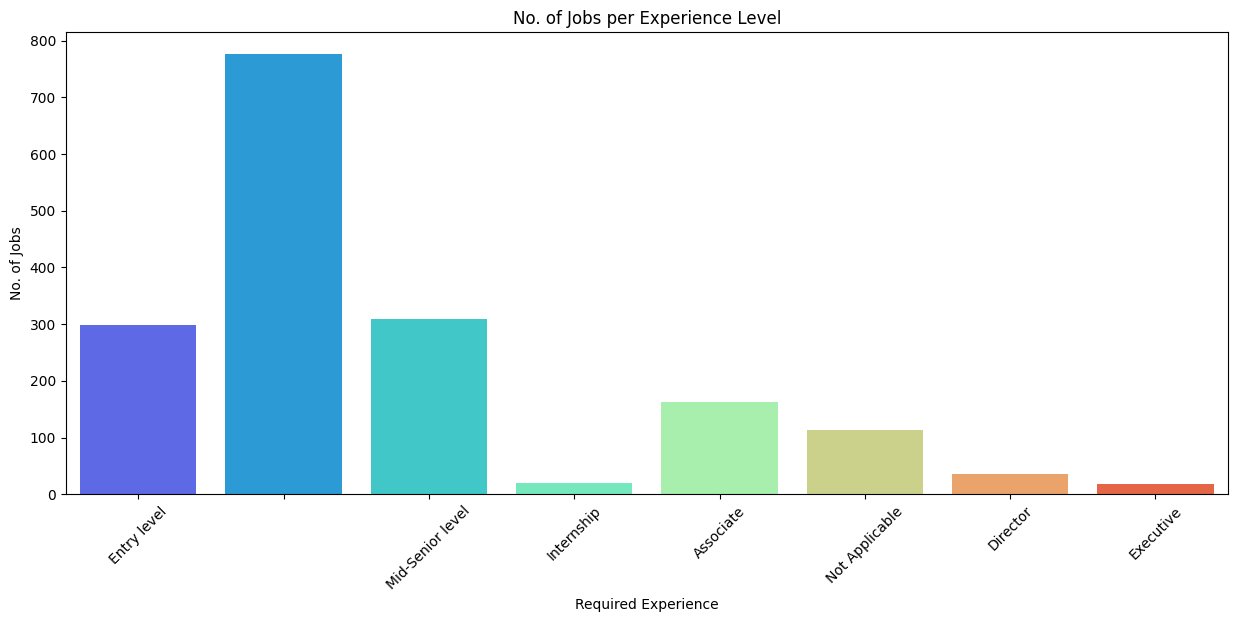

In [21]:
# No. of jobs per experience level in the data

plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'required_experience', palette='rainbow')
plt.xticks(rotation=45)
plt.title("No. of Jobs per Experience Level")
plt.ylabel("No. of Jobs")
plt.xlabel("Required Experience")
plt.show()

# **Data Preprocesssing**

In [22]:
# Combining the textual features in the dataset for easier processing of the type.

df['combined_text'] = df[textual].apply(lambda x: ' '.join(str(i) for i in x if pd.notna(i)), axis=1)
df.drop(columns = textual, inplace=True)

df.head(5)

,fraudulent,combined_text
0,0,"Business Development Call Center Rep US, SC, B..."
1,0,"Service Champion Full-time and Part-time US, N..."
2,0,"Human Resources Partner US, CA, Redlands HR ..."
3,0,"Enterprise Integration Developer US, CA, Redla..."
4,0,"Senior Software Engineer - Android US, TX, Aus..."


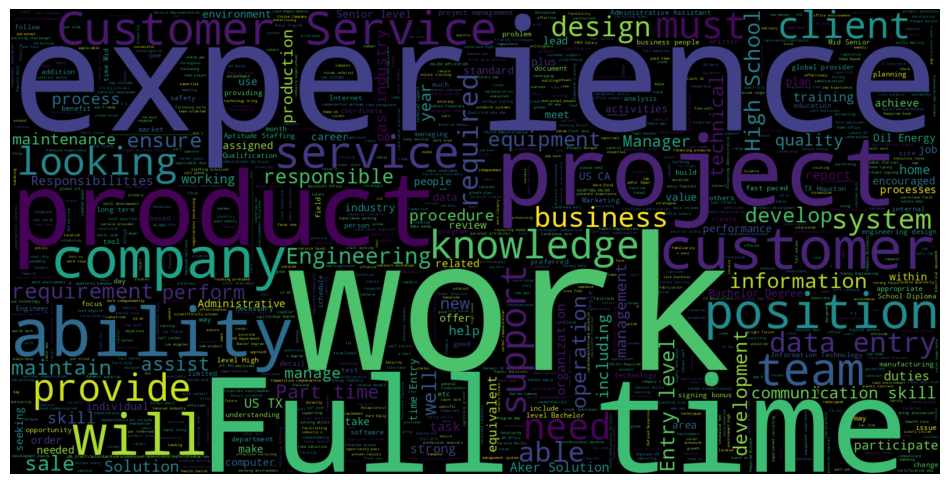

In [23]:
# WordCloud for the fraudulent == 1 records of dataset

plt.figure(figsize=(12,12))
wc = WordCloud(width=1600, height=800, max_words=3000).generate(" ".join(df[df.fraudulent == 1].combined_text))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

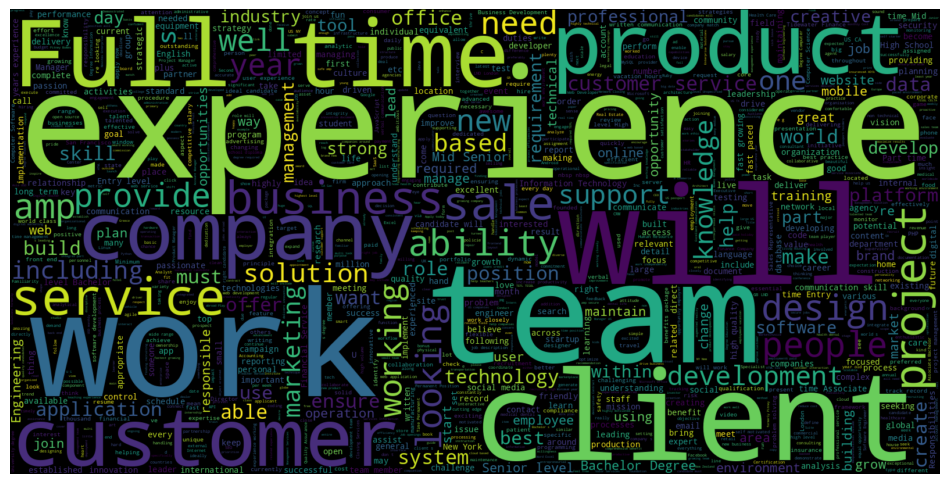

In [24]:
# WordCloud for the fraudulent == 0 records of dataset

plt.figure(figsize=(12,12))
wc = WordCloud(width=1600, height=800, max_words=3000).generate(" ".join(df[df.fraudulent == 0].combined_text))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# Defining a function and applying it for cleaning and lemmatizing the text in 'combined_text' data column.

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    wnl = WordNetLemmatizer()

    tokens = [wnl.lemmatize(word) for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

df['combined_text'] = df['combined_text'].apply(clean_text)

In [26]:
# Observing a sample of the cleaned text function output on the data

df.iloc[0]["combined_text"]

'business development call center rep u sc beaufort bdc stokes automotive group beaufort family owned operated dealer group beaufort sc stokes leader automotive market low counrty south carolina offering new toyota honda vehicle well 1000 used vehicle delivering truly exceptional experience customer strive put customer first make purchasing servicing vehicle fast fun easy experience team equipped state art facilites highest tech equipment market make stokes stand rest come join winning team stokes automotive group located beaufort sc looking business development representative proven track record join team url d3eae39e001b44c53f2be484d6874eaf087e9bf811ca69d8c4ce1d351728ba9e stokes automotive group belief promoting associate manager within dealership group strive deliver truly exceptional experience every customer contact day winning franchise toyota honda business dramatically increasing need staff assist customer business development department growing entry level position opening man

In [27]:
# Separating the target and feature columns.

text_x = df.drop('fraudulent',axis=1)
text_y = df['fraudulent']

In [28]:
text_x.head(5)

,combined_text
0,business development call center rep u sc beau...
1,service champion full time part time u ny port...
2,human resource partner u ca redlands hr passio...
3,enterprise integration developer u ca redlands...
4,senior software engineer android u tx austin s...


In [29]:
text_y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

# **Feature Extraction and Train Test Split**

In [30]:
# Feature Extraction from text using TF-IDF Vectorizer using Column Transformer

column_transform = ColumnTransformer([("tfidf", TfidfVectorizer(),"combined_text")])
text_x_trans = column_transform.fit_transform(text_x)

In [31]:
# Previewing the feature matrix created after vectorizer application

text_x_trans

<1732x22461 sparse matrix of type '<class 'numpy.float64'>'
	with 280621 stored elements in Compressed Sparse Row format>

In [32]:
# Train Test Split

text_X_train, text_X_test, text_y_train, text_y_test = train_test_split(text_x_trans,text_y,test_size = 0.2,random_state = 42)

# **Model Evaluation for Normal Models**

In [46]:
# Creating this show a model metric summary later in the notebook

analysis_data = []

Classification Report for Logistic Regression : 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       185
           1       0.89      0.91      0.90       162

    accuracy                           0.90       347
   macro avg       0.90      0.91      0.90       347
weighted avg       0.91      0.90      0.90       347

Accuracy : 90.49 %



<Figure size 800x600 with 0 Axes>

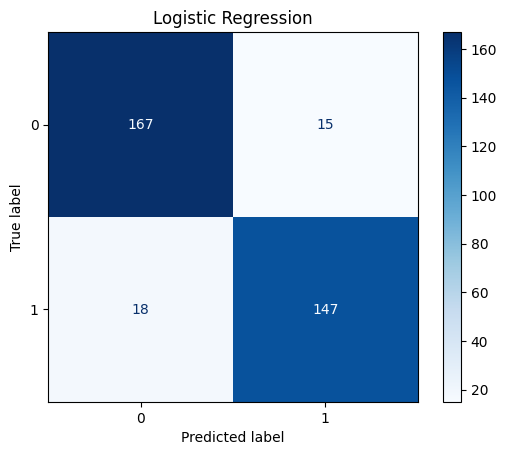


Classification Report for Decision Tree Classifier : 
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       172
           1       0.87      0.82      0.84       175

    accuracy                           0.84       347
   macro avg       0.85      0.84      0.84       347
weighted avg       0.85      0.84      0.84       347

Accuracy : 84.44 %



<Figure size 800x600 with 0 Axes>

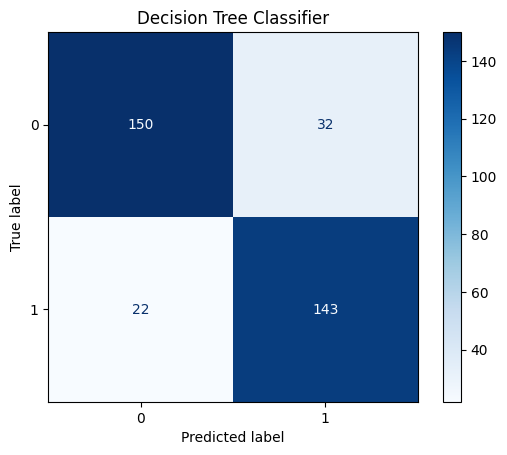


Classification Report for Linear Support Vector Machines : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       189
           1       0.90      0.94      0.92       158

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347

Accuracy : 92.22 %



<Figure size 800x600 with 0 Axes>

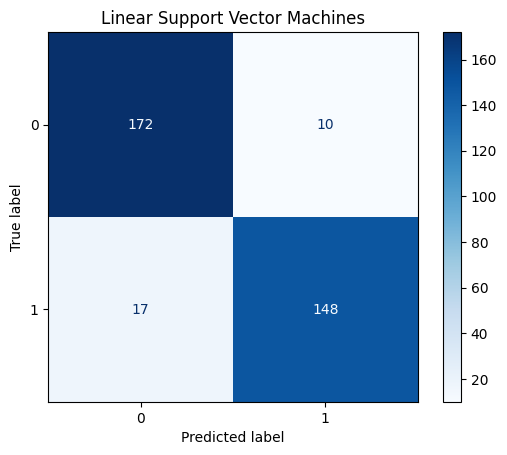


Classification Report for Multinomial Naive Bayes : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       168
           1       0.93      0.85      0.89       179

    accuracy                           0.89       347
   macro avg       0.89      0.89      0.89       347
weighted avg       0.89      0.89      0.89       347

Accuracy : 89.05 %



<Figure size 800x600 with 0 Axes>

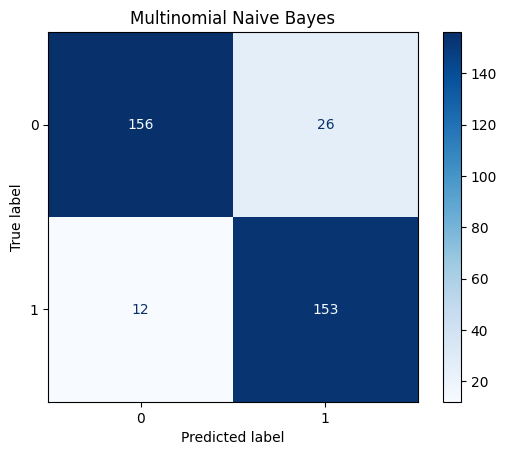


Classification Report for Multi Layer Perceptron : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       180
           1       0.95      0.94      0.95       167

    accuracy                           0.95       347
   macro avg       0.95      0.95      0.95       347
weighted avg       0.95      0.95      0.95       347

Accuracy : 94.81 %



<Figure size 800x600 with 0 Axes>

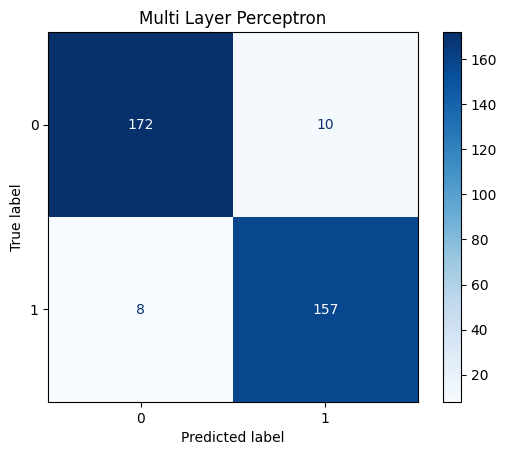

In [47]:
# Normal Models

normal_models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Linear Support Vector Machines': LinearSVC(),
    'Multinomial Naive Bayes' : MultinomialNB(),
    'Multi Layer Perceptron' : MLPClassifier()
}

for model_name in normal_models:
  model = normal_models[model_name]
  model.fit(text_X_train,text_y_train)
  pred = model.predict(text_X_test)
  print(f"Classification Report for {model_name} : \n{classification_report(pred,text_y_test)}\nAccuracy : {round(accuracy_score(pred,text_y_test)*100,2)} %\n")
  analysis_data.append([model_name,round(accuracy_score(pred,text_y_test)*100,2),round(precision_score(pred,text_y_test)*100,2),round(f1_score(pred,text_y_test)*100,2)])

  # Confusion Matrix
  plt.figure(figsize = (8,6))
  disp = ConfusionMatrixDisplay.from_estimator(
        model,
        text_X_test,
        text_y_test,
        display_labels = df['fraudulent'].unique(),
        cmap=plt.cm.Blues
  )
  plt.title(model_name)
  plt.show()

  print()


# **Model Evaluation for Ensemble Learning Techniques**

Classification Report for Gradient Boosting Classifier : 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       180
           1       0.92      0.90      0.91       167

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347

Accuracy : 91.35 %



<Figure size 800x600 with 0 Axes>

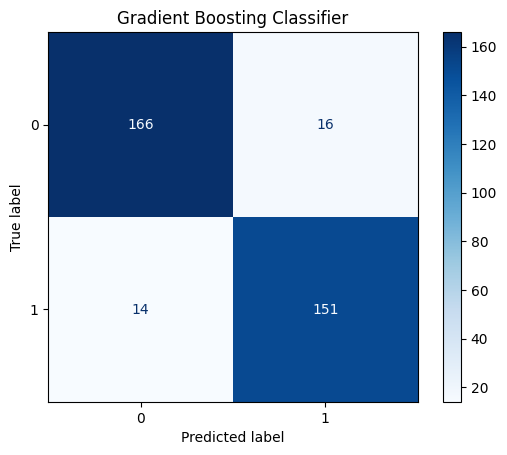


Classification Report for Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       184
           1       0.91      0.92      0.91       163

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347

Accuracy : 91.93 %



<Figure size 800x600 with 0 Axes>

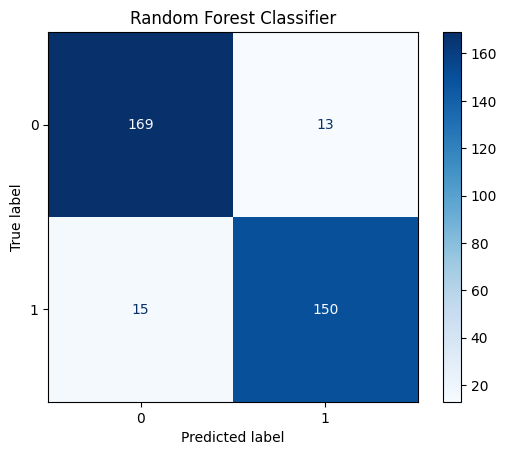


Classification Report for AdaBoost Classifier : 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       186
           1       0.87      0.89      0.88       161

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.89      0.88      0.88       347

Accuracy : 88.47 %



<Figure size 800x600 with 0 Axes>

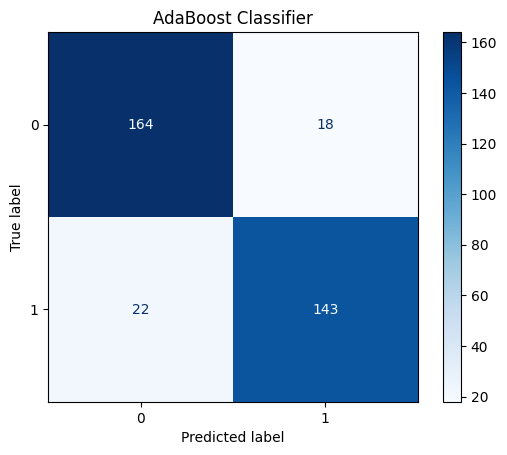


Classification Report for XG Boost Classifier : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       183
           1       0.92      0.93      0.92       164

    accuracy                           0.93       347
   macro avg       0.93      0.93      0.93       347
weighted avg       0.93      0.93      0.93       347

Accuracy : 92.8 %



<Figure size 800x600 with 0 Axes>

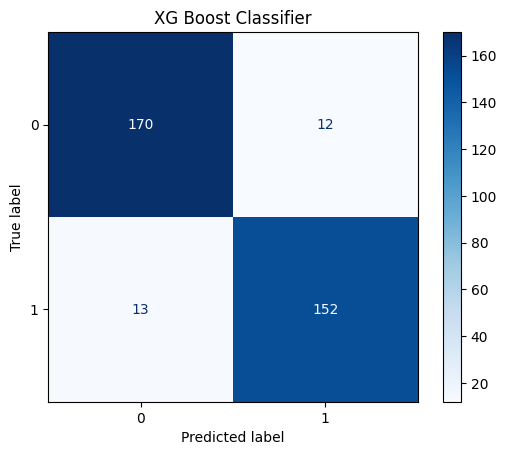

In [48]:
# Ensemble Models

ensemble_models = {
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'AdaBoost Classifier' : AdaBoostClassifier(),
    'XG Boost Classifier' : xgb.XGBClassifier()
}

for model_name in ensemble_models:
  model = ensemble_models[model_name]
  model.fit(text_X_train,text_y_train)
  pred = model.predict(text_X_test)
  print(f"Classification Report for {model_name} : \n{classification_report(pred,text_y_test)}\nAccuracy : {round(accuracy_score(pred,text_y_test)*100,2)} %\n")
  analysis_data.append([model_name,round(accuracy_score(pred,text_y_test)*100,2),round(precision_score(pred,text_y_test)*100,2),round(f1_score(pred,text_y_test)*100,2)])

  # Confusion Matrix
  plt.figure(figsize = (8,6))
  disp = ConfusionMatrixDisplay.from_estimator(
        model,
        text_X_test,
        text_y_test,
        display_labels = df['fraudulent'].unique(),
        cmap=plt.cm.Blues
  )
  plt.title(model_name)
  plt.show()

  print()

# **Model Evaluation for KNN**

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       183
           1       0.92      0.93      0.92       164

    accuracy                           0.93       347
   macro avg       0.93      0.93      0.93       347
weighted avg       0.93      0.93      0.93       347

Accuracy :  92.8  %



<Figure size 800x600 with 0 Axes>

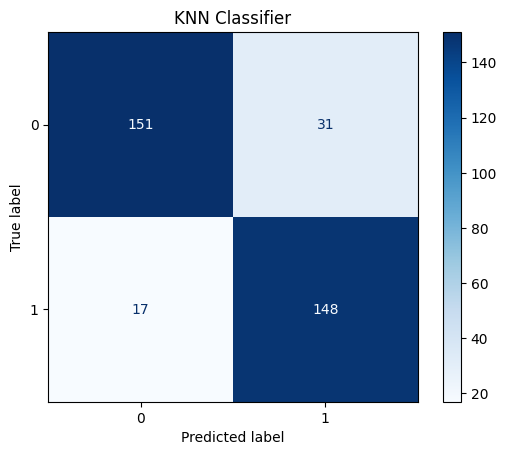

In [49]:
# KNN Classifier.

model1 = KNeighborsClassifier(n_neighbors = 11)
model1.fit(text_X_train,text_y_train)
pred1 = model.predict(text_X_test)
print("Classification Report for KNN Classifier:")
print(classification_report(pred1,text_y_test))
print("Accuracy : ",round(accuracy_score(pred1,text_y_test)*100,2)," %\n")
analysis_data.append(["KNN Classifier",round(accuracy_score(pred1,text_y_test)*100,2),round(precision_score(pred1,text_y_test)*100,2),round(f1_score(pred1,text_y_test)*100,2)])

# Confusion Matrix
plt.figure(figsize = (8,6))
disp = ConfusionMatrixDisplay.from_estimator(
      model1,
      text_X_test,
      text_y_test,
      display_labels = df['fraudulent'].unique(),
      cmap=plt.cm.Blues
)
plt.title("KNN Classifier")
plt.show()

In [50]:
# Model Metrics Summary

display(pd.DataFrame(list(sorted(analysis_data,reverse=True,key = lambda x: x[1])),columns=["Model","Accuracy(%)","Precision(%)","F1-Score(%)"]))

,Model,Accuracy(%),Precision(%),F1-Score(%)
0,Multi Layer Perceptron,94.81,95.15,94.58
1,XG Boost Classifier,92.80,92.12,92.40
2,KNN Classifier,92.80,92.12,92.40
3,Linear Support Vector Machines,92.22,89.70,91.64
4,Random Forest Classifier,91.93,90.91,91.46
5,Gradient Boosting Classifier,91.35,91.52,90.96
6,Logistic Regression,90.49,89.09,89.91
7,Multinomial Naive Bayes,89.05,92.73,88.95
8,AdaBoost Classifier,88.47,86.67,87.73
9,Decision Tree Classifier,84.44,86.67,84.12


# **Predicting using the best model out of all the evaluated models**

In [52]:
# Best Model to be used to demonstrate use of the system

model = MLPClassifier()

# Now training our model on the whole dataset

model.fit(text_x_trans,text_y)

MLPClassifier()

In [53]:
# Predict function for the end user

def predict(job_desc):
  combined_text_index = text_x.columns.get_loc("combined_text")
  vectorizer = column_transform.transformers_[combined_text_index][1]
  test_matrix = vectorizer.transform(job_desc)
  result = model.predict(test_matrix)
  return result

In [54]:
# User side demonstration for an actual job posting from Linked In

# Link : https://www.linkedin.com/jobs/view/3905345003

def main_function():
  title = input("Job Title : ")
  location = input("Location : ")
  department = input("Department : ")
  salary_range = input("Salary Range : ")
  company_profile = input("Company Profile : ")
  description = input("Job Description : ")
  requirements = input("Requirements : ")
  benefits = input("Benefits : ")
  employment_type = input("Employment Type : ")
  required_experience = input("Required Experience : ")
  required_education = input("Required Education : ")
  industry = input("Industry of the Company : ")
  function = input("Function of the Job : ")

  inputs = [title,location,department,salary_range,
            company_profile,description,requirements,benefits,
            employment_type,required_experience,
            required_education,industry,function]


  input_text = [' '.join(inputs)]

  input_text[0] = clean_text(input_text[0])

  if(predict(input_text)[0] == 0):
    print("Genuine")
  else:
    print("Fraud")

main_function()

Job Title : Artificial Intelligence Intern
Location : Remote
Department : Artificial Intelligence
Salary Range :  
Company Profile : Rethink security with AI! We're Aristiun, and our cutting-edge, patent-pending AI technologies are transforming how organizations approach security. Our flagship suite, Aribot, harnesses AI for: Threat Modeling Automation: Reduce manual effort, identify more threats, and easily achieve compliance. Cloud Security (CSPM): Continuous compliance insights and automated remediation for major cloud platforms. Application Security (ASPM): Protect applications throughout development with intelligent insights. CI/CD Pipeline Security: Secure your software supply chain and prevent pipeline misuse. Beyond Aribot, our unified platform offers complete visibility, simplifies risk & compliance, and enables proactive risk management. Join us and help make a difference in the world of safety and cybersecurity!
Job Description : Develop and optimize machine learning models 

**Conclusion :**

**We observed that Multi-Layer Perceptron came out on top as the best machine learning model for this use-case with 94.81 % accuracy and have successfully demonstrated its use on an actual real-world job posting.**